# Import SKLearn Neural Network and MNIST dataset
This is based on the example from https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# Load the data

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

# Split the testing and training data

In [3]:
test_size = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=test_size)

# Define the classifier

In [4]:
# hidden layer shape - this can be tinkered with
layers = (40,)

clf = MLPClassifier(solver = "lbfgs",
                    alpha = 1e-5,
                    hidden_layer_sizes=layers,
                    max_iter = 8,
                    random_state=1,
                    learning_rate_init = 0.2)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    clf.fit(X_train, y_train)

# Get scores for the training and testing set

In [5]:
print(f"Training set score: {clf.score(X_train, y_train)}")
print(f"Test set score: {clf.score(X_test, y_test)}")

Training set score: 0.8151904761904762
Test set score: 0.8114489795918367


# Displaying the data with the network's predictions

(49000, 784)


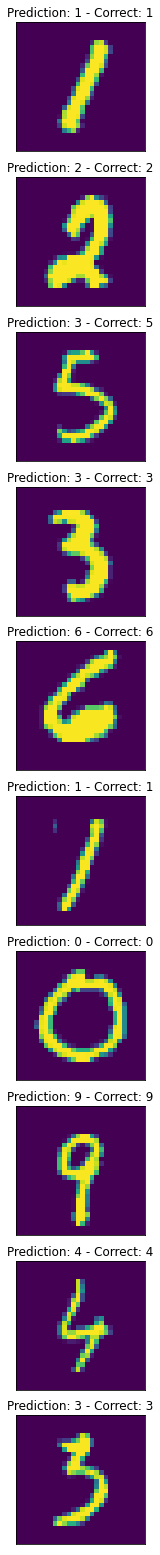

In [6]:
test_predict = clf.predict(X_test)

figs, axes = plt.subplots(10, figsize = (28, 28))
print(X_test.shape)
# Show the first 10 predictions from the test dataset
for img, pred, answer, ax in zip(X_test[10:], test_predict[10:], y_test[10:], axes):
    ax.matshow(img.reshape(28, 28))
    ax.set_xticks(())
    ax.set_yticks(())
    ax.title.set_text(f"Prediction: {pred} - Correct: {answer}")

# Displaying the incorrectly classified samples and confusion matrix

[[4526    0   53   33    8  122   39    1   19    2]
 [   1 5224  111   26    1   24   25   14  117    7]
 [ 155  109 3906  120  130   20  190   49  248   44]
 [  69   16  199 4099    8  202   18   65  192  178]
 [  30   80   29   22 3635   10  120   20   54  749]
 [ 173  118  126  473  150 3029  183   90   33   60]
 [ 122   91   81    2  105   88 4276    0   22    0]
 [ 104  105   22   12  104    8    0 4361   69  335]
 [  32  153  507  296   95  230   98   56 2987  265]
 [ 110   42   30   98  353   35   14  371   49 3718]]
Number Missed: 9239


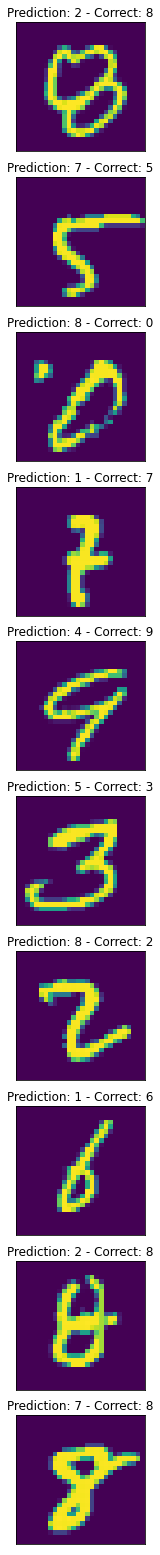

In [7]:
test_predict = clf.predict(X_test)
confusion = confusion_matrix(y_test, test_predict)
print(confusion)

missed = test_predict != y_test

figs, axes = plt.subplots(10, figsize = (28, 28))
print(f"Number Missed: {test_predict[missed].size}")

# Show the first 10 incorrect predictions from the test dataset
for img, pred, answer, ax in zip(X_test[missed][10:], test_predict[missed][10:], y_test[missed][10:], axes):
    ax.matshow(img.reshape(28, 28))
    ax.set_xticks(())
    ax.set_yticks(())
    ax.title.set_text(f"Prediction: {pred} - Correct: {answer}")
